In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Math, display

In [2]:
# read CSV dataset 
dataset = pd.read_csv("/kaggle/input/data-csv/Salary_Data.csv")
independent_x = dataset.iloc[:, :-1].values
dependent_y = dataset.iloc[:, -1].values
independent_x, dependent_y

(array([[ 1.1],
        [ 1.3],
        [ 1.5],
        [ 2. ],
        [ 2.2],
        [ 2.9],
        [ 3. ],
        [ 3.2],
        [ 3.2],
        [ 3.7],
        [ 3.9],
        [ 4. ],
        [ 4. ],
        [ 4.1],
        [ 4.5],
        [ 4.9],
        [ 5.1],
        [ 5.3],
        [ 5.9],
        [ 6. ],
        [ 6.8],
        [ 7.1],
        [ 7.9],
        [ 8.2],
        [ 8.7],
        [ 9. ],
        [ 9.5],
        [ 9.6],
        [10.3],
        [10.5]]),
 array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
         54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
         61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
         98273., 101302., 113812., 109431., 105582., 116969., 112635.,
        122391., 121872.]))

In [3]:
# decouple train and test data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(independent_x, dependent_y, random_state=0, test_size=0.2)
x_train, x_test, y_train, y_test

(array([[ 9.6],
        [ 4. ],
        [ 5.3],
        [ 7.9],
        [ 2.9],
        [ 5.1],
        [ 3.2],
        [ 4.5],
        [ 8.2],
        [ 6.8],
        [ 1.3],
        [10.5],
        [ 3. ],
        [ 2.2],
        [ 5.9],
        [ 6. ],
        [ 3.7],
        [ 3.2],
        [ 9. ],
        [ 2. ],
        [ 1.1],
        [ 7.1],
        [ 4.9],
        [ 4. ]]),
 array([[ 1.5],
        [10.3],
        [ 4.1],
        [ 3.9],
        [ 9.5],
        [ 8.7]]),
 array([112635.,  55794.,  83088., 101302.,  56642.,  66029.,  64445.,
         61111., 113812.,  91738.,  46205., 121872.,  60150.,  39891.,
         81363.,  93940.,  57189.,  54445., 105582.,  43525.,  39343.,
         98273.,  67938.,  56957.]),
 array([ 37731., 122391.,  57081.,  63218., 116969., 109431.]))

In [4]:
# train with sklearn using simple linear regression 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train) # exp, salary
b0 = regressor.intercept_
b1 = regressor.coef_[0]
print(f"b0/intercept/constant = {b0:.2f}")
print(f"b1/coefficient/slope = {b1:.2f}")

b0/intercept/constant = 26780.10
b1/coefficient/slope = 9312.58


In [5]:
# predict salary for 25 years of exp
equation1 = fr"""
\begin{{align*}}
\hat y = b_0 + b_1 x_1 \\
b_0 = {b0:.2f} \\
b_1 = {b1:.2f} \\
x_1 = 25 \\
\end{{align*}}
"""
display(Math(equation1))
print(f"25 years of ex salary -> {b0:.2f} + ({b1:.2f} * 25) ->  {b0 + (b1*25):.2f}")
print(f"with regression predict: {regressor.predict([[25]])[0]:.2f}")

<IPython.core.display.Math object>

25 years of ex salary -> 26780.10 + (9312.58 * 25) ->  259594.48
with regression predict: 259594.48


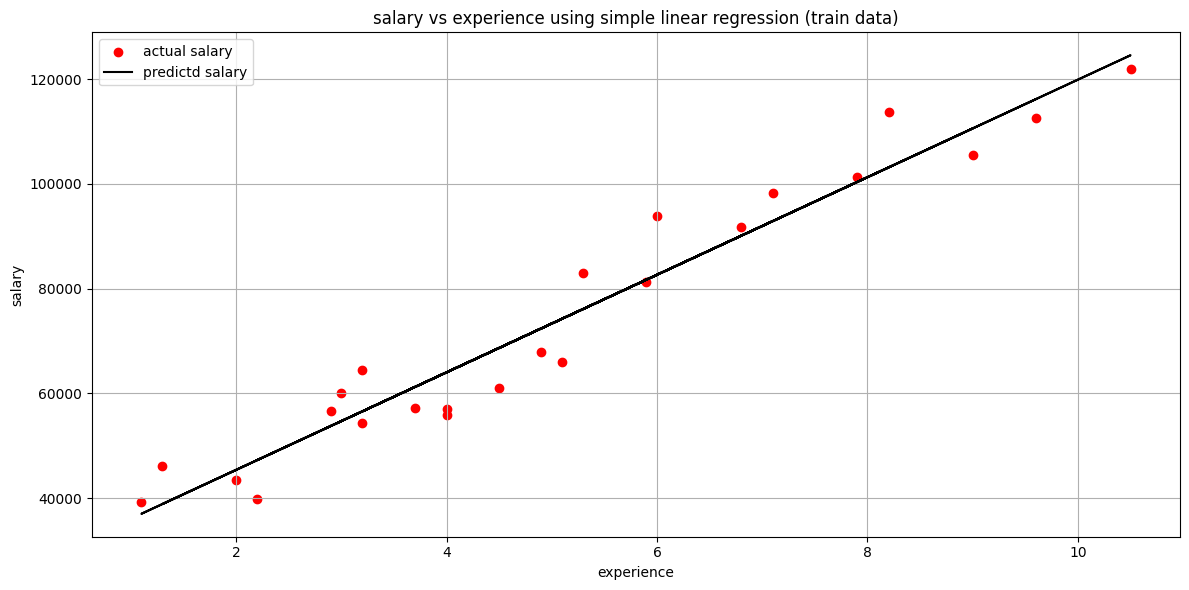

In [6]:
# predict salary with exp for train data.
plt.figure(figsize=(12, 6))
plt.scatter(x_train, y_train, color="red", label="actual salary")
plt.plot(x_train, regressor.predict(x_train), color="black", label="predictd salary")
plt.legend()
plt.title("salary vs experience using simple linear regression (train data)")
plt.xlabel("experience")
plt.ylabel("salary")
plt.grid(True)
plt.tight_layout()
plt.show()

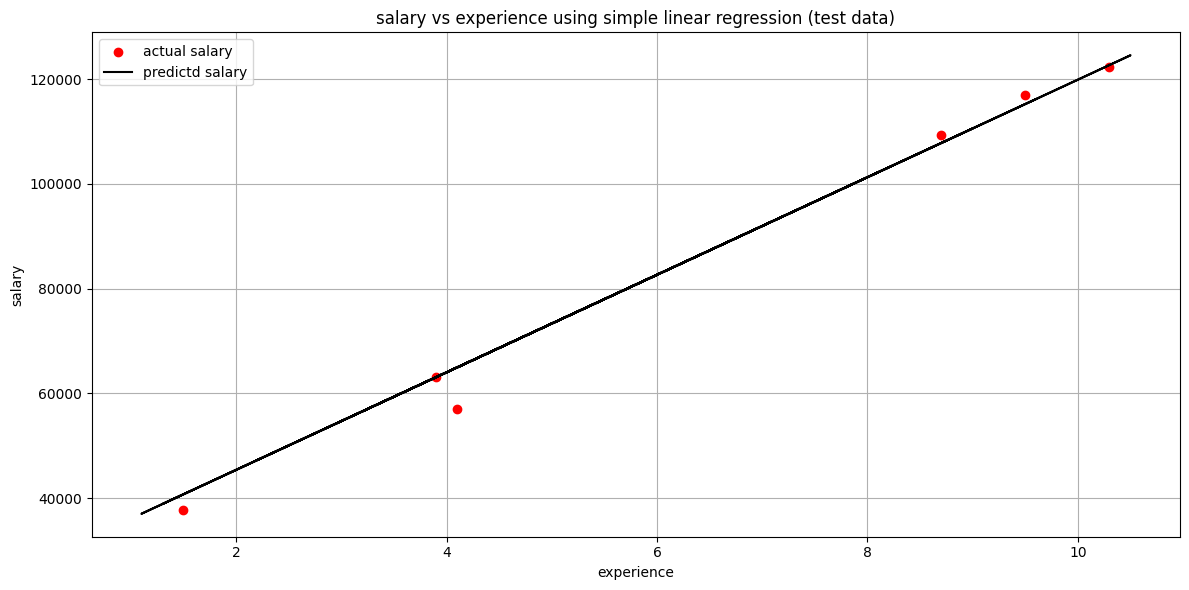

In [7]:
# predict salary with exp for test data.
plt.figure(figsize=(12, 6))
plt.scatter(x_test, y_test, color="red", label="actual salary")
plt.plot(x_train, regressor.predict(x_train), color="black", label="predictd salary")
plt.legend()
plt.title("salary vs experience using simple linear regression (test data)")
plt.xlabel("experience")
plt.ylabel("salary")
plt.grid(True)
plt.tight_layout()
plt.show()